# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [642]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import tweepy
from io import StringIO
import json
from tqdm import tqdm


In [643]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv') # read in the data

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [644]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
data = response.text
image_pred = pd.read_csv(StringIO(data), sep='\t')
image_pred.to_csv('image_predictions.tsv')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [645]:
from dotenv import load_dotenv
load_dotenv()

bearer_token = os.environ.get('BEARER_TOKEN')

tweet_id = list(tweet_archive['tweet_id'])
missing_tweets = []

In [646]:
# if not os.path.exists('tweet_json.txt'):
#     with open('tweet_json.txt', 'w'): pass
# def get_tweet():
#     auth = tweepy.OAuth2BearerHandler(bearer_token)
#     api = tweepy.API(auth)
#     for id in tqdm(tweet_id):
#         try:
#             tweet = api.get_status(id, tweet_mode='extended')
#             with open('tweet_json.txt', 'a') as f:
#                 json.dump(tweet._json, f)
#                 f.write('\n')
#         except:
#             print('Missing Tweet for id: {}'.format(id))
#             missing_tweets.append(id)
#             continue

# # Driver code
# if __name__ == '__main__':
# #   Call the function
#     get_tweet()


In [647]:
# with open('tweet_json.txt', 'r') as f:
with open('json.txt', 'r') as f:
    gathered_tweet_df = pd.DataFrame(columns=('tweet_id', 'retweet_count', 'favorite_count'))
    tweets = f.readlines()
    for tweet in tweets:
        tweet = json.loads(tweet)
        gathered_tweet_df.loc[len(gathered_tweet_df.index)] = [tweet['id'], tweet['retweet_count'], tweet['favorite_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [648]:
gathered_tweet_df.shape

(2354, 3)

In [649]:
gathered_tweet_df.sample(4)

,tweet_id,retweet_count,favorite_count
1507,691459709405118465,1294,4449
1452,695446424020918272,2026,4787
244,845812042753855489,9894,31737
674,789530877013393408,3942,13188


In [650]:
gathered_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 73.6+ KB


In [651]:
gathered_tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,667495797102141441,3652,0
freq,1,5,179


In [652]:
# Check null values in gathered_tweet_df
gathered_tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [653]:
# Check duplicates in gathered_tweet_df
gathered_tweet_df.duplicated().sum()

0

In [654]:
image_pred.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1436,773922284943896577,https://pbs.twimg.com/media/Cr2GNdlW8AAbojw.jpg,1,Pomeranian,0.554331,True,Samoyed,0.432158,True,chow,0.003199,True
1134,728653952833728512,https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg,2,window_shade,0.594333,False,studio_couch,0.053515,False,rotisserie,0.041248,False
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True
1887,847971574464610304,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,coffee_mug,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False


In [655]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [656]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [657]:
# Check duplicates in image_pred
image_pred.duplicated().sum()

0

In [658]:
# Check null values in tweet_archive
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [659]:
tweet_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
715,783839966405230592,NaN,NaN,2016-10-06 01:23:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Riley. His owner put a donut pillow around him and he loves it so much he won't let anyone take it off. 13/10 https://t.co/8TCQcsZCZ8,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1",13,10,Riley,None,None,None,None
1061,741303864243200000,NaN,NaN,2016-06-10 16:19:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Theodore. He just saw an adult wearing crocs. Did him a frighten. Lost other ear back in nam. 12/10 hero af https://t.co/O4iw9NlLaQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741303864243200000/photo/1,12,10,Theodore,None,None,None,None
888,759846353224826880,NaN,NaN,2016-07-31 20:21:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kirby. He's a Beneblip Cumberpat. Pretty heckin rare. 11/10 would put my face against his face https://t.co/fd6uucghY6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759846353224826880/photo/1,11,10,Kirby,None,None,None,None
470,816816676327063552,NaN,NaN,2017-01-05 01:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Timber. He misses Christmas. Specifically the presents part. 12/10 cheer pup Timber https://t.co/dVVavqpeF9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816816676327063552/photo/1,12,10,Timber,None,None,None,None


In [660]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [661]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [662]:
# Check null values in tweet_archive
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [663]:
''' Columns such as retweet_status_id have high null values
Those columns and some other ones have high null values and are not useful for our analysis
'''


' Columns such as retweet_status_id have high null values\nThose columns and some other ones have high null values and are not useful for our analysis\n'

In [664]:
# Check duplicates in tweet_archive
tweet_archive.duplicated().sum()

0

In [665]:
tweet_archive.query('doggo == "doggo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758080503809,14,10,None,doggo,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kyle (pronounced 'Mitch'). He strives to be the best doggo he can be. 11/10 would pat on head approvingly https://t.co/aA2GiTGvlE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214819057664/photo/1,11,10,Kyle,doggo,None,None,None
1141,727644517743104000,NaN,NaN,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo struggling to cope with the winds. 13/10 https://t.co/qv3aUwaouT,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/727644517743104000/photo/1,https://twitter.com/dog_rates/status/727644517743104000/photo/1",13,10,None,doggo,None,None,None
1156,724771698126512129,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Nothin better than a doggo and a sunset. 11/10 https://t.co/JlFqOhrHEs,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/724771698126512129/photo/1,https://twitter.com/dog_rates/status/724771698126512129/photo/1,https://twitter.com/dog_rates/status/724771698126512129/photo/1,https://twitter.com/dog_rates/status/724771698126512129/photo/1",11,10,None,doggo,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This doggo was initially thrilled when she saw the happy cartoon pup but quickly realized she'd been deceived. 10/10 https://t.co/mvnBGaWULV,NaN,NaN

In [666]:
# Get some of unique values in the floofer column
tweet_archive.groupby('floofer').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,pupper,puppo
floofer,,,,,,,,,,,,,,,,
None,2346,78,78,2346,2346,2346,181,181,181,2287,2346,2346,2346,2346,2346,2346
floofer,10,0,0,10,10,10,0,0,0,10,10,10,10,10,10,10


In [667]:
# Get some of unique values in the puppo column
tweet_archive.groupby('puppo').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper
puppo,,,,,,,,,,,,,,,,
None,2326,77,77,2326,2326,2326,176,176,176,2268,2326,2326,2326,2326,2326,2326
puppo,30,1,1,30,30,30,5,5,5,29,30,30,30,30,30,30


In [668]:
pd.set_option('display.max_colwidth', None)

In [669]:
# Find the tweet with the highest rating numerator
tweet_archive.query('rating_numerator == rating_numerator.max()')['text']

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object

In [670]:
tweet_archive[['text','name', 'rating_numerator', 'rating_denominator']].sample(15)


,text,name,rating_numerator,rating_denominator
332,RT @EmilieGambril: 12/10 h*cking excited about my new shirt! @dog_rates https://t.co/zFEfMTaHqU,None,12,10
1826,Hope your Monday isn't too awful. Here's two baseball puppers. 11/10 for each https://t.co/dB0H9hdZai,None,11,10
1836,Extremely rare pup here. Very religious. Always praying. Too many legs. Not overwhelmingly fluffy. Won't bark. 3/10 https://t.co/REyE5YKVBb,None,3,10
1133,This is Flurpson. He can't believe it's not butter. 10/10 https://t.co/XD3ort1PsE,Flurpson,10,10
876,This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK,Bo,11,10
721,This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu,Dave,12,10
309,RT @dog_rates: Meet Lola. Her hobbies include being precious af and using her foot as a toothbrush. 12/10 Lola requests your help\n\nhttps://…,Lola,12,10
1658,This is Larry. He thought the New Year's parties were tonight. 10/10 poor pupper. Maybe next year https://t.co/h3X0jK8MVM,Larry,10,10
1829,Say hello to Winston. He has no respect for the system. Much rebellion. I think that's a palm tree... nice. 8/10 https://t.co/dOLQddhXLZ,Winston,8,10
1437,This is Oakley. He has a massive tumor growing on his head. Seems benign tho. 10/10 would pet around tumor https://t.co/7GQ7BTxywN,Oakley,10,10


In [671]:
tweet_archive[['text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].sample(15)

,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
160,RT @tallylott: h*ckin adorable promposal. 13/10 @dog_rates https://t.co/6n8hzNihJ9,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000
1937,This is Obie. He is on guard watching for evildoers from the comfort of his pumpkin. Very brave pupper. 11/10 https://t.co/cdwPTsGEAb,NaN,NaN,NaN
1393,This is Coops. His ship is taking on water. Sound the alarm. Much distress. Requesting immediate assistance. 10/10 https://t.co/8Nuny4lLE3,NaN,NaN,NaN
2292,This is Bradlay. He is a Ronaldinho Matsuyama mix. Can also mountain bike (wow). Loves that blue light lime. 11/10 https://t.co/DKhgkMx4N1,NaN,NaN,NaN
1293,Everybody stop what you're doing and watch this video. Frank is stuck in a loop. 13/10 (Vid by @klbmatty) https://t.co/5AJs8TIV1U,NaN,NaN,NaN
1301,We usually don't rate marshmallows but this one's having so much fun in the snow. 10/10 (vid by @kylejk24) https://t.co/NL2KwOioBh,NaN,NaN,NaN
1596,When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe,NaN,NaN,NaN
1731,This is Willie. He's floating away and needs your assistance. Please someone help Willie. 10/10 https://t.co/MJqygWqt8X,NaN,NaN,NaN
1003,This is Huxley. He's pumped for #BarkWeek. Even has a hat. Ears are quite magical. 11/10 would remove hat to pat https://t.co/V7h5NMYbYz,NaN,NaN,NaN
276,Say hello to Maddie and Gunner. They are considerably pupset about bath time. Both 12/10 but Gunner needs your help\n\nhttps://t.co/JesYTzb1Jo https://t.co/5cncH08G1o,NaN,NaN,NaN


In [672]:
tweet_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Charleson      1
Duddles        1
Lilah          1
Scott          1
Harvey         1
Name: name, Length: 957, dtype: int64

### Quality issues
``tweet_archive table``

1. Some of the tweets are retweets and some are not even about dogs and still have ratings

2. Some of the columns like in_reply_to_status_id, in_reply_to_user_id have no real use case and are motly null

3. Some of the dog names are incorrect and some of them having the value None

4. Incorrect ratings for some of the dogs

5. Incorrect data type for some of the columns like timestamp

6. Lots of None values in the dog types columns

``image_pred table``

7. Tweets with false p1_dog value tend not to be dog

8. Image number column doesn't seem to convey any actual value for analysis

9. Wrong data type for p1, p2, p3

### Tidiness issues
1. The dog stages should have been a single column instead of being split into three

2. Too many datasets. They can be merged for managability

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [673]:
# Make copies of original pieces of data
tweet_archive_copy = tweet_archive.copy()
image_pred_copy = image_pred.copy()
gathered_tweet_df_copy = gathered_tweet_df.copy()

In [674]:
dogitionary = ['doggo', 'floofer', 'pupper', 'puppo']

### Issue #1:
* Some of the tweets are retweets and may not be about dogs

#### Define:
- Tweets having non-null values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp should be dropped
- It is noticed from the describe function above we have a total of 181 non-null values in these columns

#### Code

In [675]:
tweet_archive_copy.shape

(2356, 17)

In [676]:
# Drop rows having non-null values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns of tweet_archive_copy
tweet_archive_copy = tweet_archive_copy.loc[tweet_archive_copy['retweeted_status_id'].isnull()]

In [677]:
# Drop the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns of tweet_archive_copy
tweet_archive_copy = tweet_archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [678]:
tweet_archive_copy.shape


(2175, 14)

In [679]:
tweet_archive_copy.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2023,671896809300709376,NaN,NaN,2015-12-02 03:40:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lola. She fell asleep on a piece of pizza. 10/10 frighteningly relatable https://t.co/eqmkr2gmPH,https://twitter.com/dog_rates/status/671896809300709376/photo/1,10,10,Lola,None,None,None,None
2047,671518598289059840,NaN,NaN,2015-12-01 02:38:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scruffers. He's being violated on multiple levels and is not happy about it. 9/10 hang in there Scruffers https://t.co/nLQoltwEZ7,https://twitter.com/dog_rates/status/671518598289059840/photo/1,9,10,Scruffers,None,None,None,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","For those who claim this is a goat, u are wrong. It is not the Greatest Of All Time. The rating of 5/10 should have made that clear. Thank u",NaN,5,10,None,None,None,None,None
1874,675135153782571009,NaN,NaN,2015-12-11 02:08:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Steven. He got locked outside. Damn it Steven. 5/10 nice grill tho https://t.co/zf7Sxxjfp3,https://twitter.com/dog_rates/status/675135153782571009/photo/1,5,10,Steven,None,None,None,None


### Issue #2:
- Invalid columns with almost all NaN values

#### Define:
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,source
- Drop above columns with the drop function

#### Code

In [680]:
useless_columns = ['in_reply_to_status_id', 'in_reply_to_user_id','source']

In [681]:
tweet_archive_copy.drop(useless_columns, axis=1, inplace=True)

#### Test

In [682]:
tweet_archive_copy.sample(4)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1569,687807801670897665,2016-01-15 01:25:33 +0000,Meet Trooper &amp; Maya. Trooper protects Maya from bad things like dognappers and Comcast. So touching. 11/10 for both https://t.co/c98k1IoZKy,https://twitter.com/dog_rates/status/687807801670897665/photo/1,11,10,Trooper,None,None,None,None
616,796484825502875648,2016-11-09 22:49:15 +0000,Here's a sleepy doggo that requested some assistance. 12/10 would carry everywhere https://t.co/bvkkqOjNDV,https://twitter.com/dog_rates/status/796484825502875648/photo/1,12,10,None,doggo,None,None,None
717,783695101801398276,2016-10-05 15:47:27 +0000,This is Loomis. He's the leader of the Kenneth search party. The passion is almost overwhelming. 12/10 one day he will be free https://t.co/kCRKlFg4AY,"https://twitter.com/dog_rates/status/783695101801398276/photo/1,https://twitter.com/dog_rates/status/783695101801398276/photo/1,https://twitter.com/dog_rates/status/783695101801398276/photo/1",12,10,Loomis,None,None,None,None
883,760252756032651264,2016-08-01 23:15:56 +0000,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None


### Issue #3:
- Incorrect names
- None values for some of the names

#### Define:
- Find the names that are not correct by using value count
- Replace incorrect names and None values with NaN

#### Code

In [683]:
# # First, remove all tweets that don't contain any of the dog words
# for word in dogitionary:
#     tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['text'].str.contains(word)]


In [684]:
# Create a csv file containg names of dogs and view them visually
counts = tweet_archive_copy['name'].value_counts()
counts.to_csv('name.csv', index=True)

In [685]:
# Get all the invalid names and remove them from the dataframe
# We notice invalid names starts with lowercase letters.

# Create a list of invalid names
invalid_names = ['None']
for name in tweet_archive_copy.name:
    if name[0].islower():
        invalid_names.append(name)

In [686]:
# Get unique invalid names
invalid_names = list(set(invalid_names))

In [687]:
tweet_archive_copy.shape

(2175, 11)

In [688]:
# Remove invalid names from the dataframe
tweet_archive_copy = tweet_archive_copy[~tweet_archive_copy['name'].isin(invalid_names)]
tweet_archive_copy.name.value_counts()

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Penny       9
           ..
Roscoe      1
Sierra      1
Patch       1
Moreton     1
Harvey      1
Name: name, Length: 930, dtype: int64

In [689]:
# View the dataframe
tweet_archive_copy.shape

(1391, 11)

#### Test

In [690]:
# verify that the dataframe is now clean of invalid names
tweet_archive_copy[['text','name']].sample(10)

,text,name
364,This is Malcolm. He goes from sneaky tongue slip to flirt wink city in a matter of seconds. 12/10 would hug softly https://t.co/rHwfySggqR,Malcolm
845,This is Shadoe. Her tongue flies out of her mouth at random. Can't have a serious conversation with her. 9/10 https://t.co/Tytt15VquG,Shadoe
1725,Say hello to Emmie. She's trapped in an ornament. Tragic af. Looks pretty content tho. Maybe it's meant to be. 9/10 https://t.co/Fh7geodBCU,Emmie
593,This is Shadow. He's a firm believer that they're all good dogs. H*ckin passionate about it too. 11/10 I stand with Shadow https://t.co/8yvpacwBcu,Shadow
1491,Meet Tupawc. He's actually a Christian rapper. Doesn't even understand the concept of dollar signs. 10/10 great guy https://t.co/mCqgtqLDCW,Tupawc
650,This is Bailey. She's rather h*ckin hype for Halloween tomorrow. Carved those pupkins herself. 12/10 https://t.co/v17mFm0Ftz,Bailey
966,This is Zoe. She was trying to stealthily take a picture of you but you just noticed. 9/10 not so sneaky pupper https://t.co/FfH3o88Vta,Zoe
1632,This is Jeph. He's a Western Sagittarius Dookmarriot. Frightened by leaf. Caught him off guard. 10/10 calm down Jeph https://t.co/bicyOV6lju,Jeph
217,This is Leo. He's a personal triathlon coach. Currently overseeing this athlete's push-pups. H*ckin brutal. 13/10 would do all he asks of me https://t.co/FXZQtBcnTO,Leo
326,Meet Charlie. She asked u to change the channel to Animal Planet at least 6 times. Now taking matters into her own paws. 13/10 assertive af https://t.co/WTzhtfevKY,Charlie


### Issue #4:
Incorrect Ratings for some of the dogs

#### Define
- We were told the denominator is always 10. By viewing the describe function above we can confirm the denominator has
- numbers greater than 10
- We will find all numbers greater than 10 in the denominator column and replace them with 10.
- We will also find uncommon numerators and replace them with proper values

#### Code

In [691]:
# Reset pandas display options
pd.reset_option('display.max_colwidth')

In [692]:
tweet_archive_copy[['text','name', 'rating_numerator', 'rating_denominator']].sample(10)

,text,name,rating_numerator,rating_denominator
1945,This is Raymond. He's absolutely terrified of ...,Raymond,10,10
614,Say hello to Romeo. He was just told that it's...,Romeo,11,10
1226,This is Kanu. He's a Freckled Ticonderoga. Sim...,Kanu,12,10
2095,Meet Vincent. He's a wild Adderall Cayenne. Sh...,Vincent,10,10
1496,Say hello to Cody. He's been to like 80 countr...,Cody,10,10
836,This is Tito. He's on the lookout. Nobody know...,Tito,10,10
1055,This is Phil. That's his comfort stick. He hol...,Phil,11,10
2078,This is Amy. She is Queen Starburst. 10/10 une...,Amy,10,10
2174,This is Clarq. He's a golden Quetzalcoatl. Cla...,Clarq,8,10
1827,Meet Duke. He's an Urban Parmesan. They know h...,Duke,10,10


In [693]:
# Find the distribution of denominator values
tweet_archive_copy['rating_denominator'].value_counts()

10    1388
50       1
11       1
7        1
Name: rating_denominator, dtype: int64

In [694]:
tweet_archive_copy.query('rating_denominator < 10')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [695]:
tweet_archive_copy.query('rating_denominator > 10')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13 +0000,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [696]:
# View the distribution of rating numerator
tweet_archive_copy.rating_numerator.describe()

count    1391.000000
mean       12.091301
std        47.413241
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [697]:
# Find all ratings numerator greater than the 75th percentile
greater_than_75 = tweet_archive_copy['rating_numerator'][tweet_archive_copy['rating_numerator'] > tweet_archive_copy['rating_numerator'].quantile(0.75)]
print(greater_than_75.value_counts())

13      183
14       17
1776      1
75        1
50        1
27        1
24        1
Name: rating_numerator, dtype: int64


In [698]:
pd.set_option('display.max_colwidth', None)

In [699]:
# Find the tweet with the highest rating numerator
tweet_archive_copy.query('rating_numerator == rating_numerator.max()')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [700]:
# The above tweet has a rating numerator greater than the 75th percentile and seems to somehow correlate to the American Independence Day. 
# We can drop this tweet from the dataframe since it is an outlier and we don't want to include it in our analysis.
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['rating_numerator'] != 1776]

In [701]:
tweet_archive_copy.query('rating_numerator == "75"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


In [702]:
# On close analysis we find that the extracted ratings numerator is wrong. We need to correct the rating.
# We can correct the ratings by using the approximated figure in the tweet.

# Replace the rating numerator with the approximated figure
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['rating_numerator'].apply(lambda x: 10 if x==75 else x)

In [703]:
tweet_archive_copy.query('rating_numerator == "50"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None


In [704]:
# Replace the numerator and denominator ratings having a value of 50 with the exact figure
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['rating_numerator'].apply(lambda x: 11 if x==50 else x)
tweet_archive_copy['rating_denominator'] = tweet_archive_copy['rating_denominator'].apply(lambda x: 10 if x==50 else x)


In [705]:
tweet_archive_copy.query('rating_numerator == "27"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


In [706]:
# Using the above manual process we can correct the ratings numerator to the approximated figure.
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['rating_numerator'].apply(lambda x: 11 if x==27 else x)

In [707]:
tweet_archive_copy.query('rating_numerator == "24"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


In [708]:
# Drop row with rating numerator of 24
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['rating_numerator'] != 24]

#### Test

In [709]:
# Print the highest and lowest rating denominator and numerator
tweet_archive_copy.groupby('rating_denominator').rating_numerator.max().sort_values(ascending=False)



rating_denominator
10    14
11     7
Name: rating_numerator, dtype: int64

In [710]:
tweet_archive_copy.groupby('rating_numerator').rating_denominator.max().sort_values(ascending=False)


rating_numerator
7     11
14    10
13    10
12    10
11    10
10    10
9     10
8     10
6     10
5     10
4     10
3     10
2     10
Name: rating_denominator, dtype: int64

### Issue 5:
- Some columns have wrong datatypes

#### Define
- Change datatypes for columns such as timestamp using pandas datetime function

#### Code

In [711]:
# Confirm datatypes of columns
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1389 non-null   int64 
 1   timestamp           1389 non-null   object
 2   text                1389 non-null   object
 3   expanded_urls       1389 non-null   object
 4   rating_numerator    1389 non-null   int64 
 5   rating_denominator  1389 non-null   int64 
 6   name                1389 non-null   object
 7   doggo               1389 non-null   object
 8   floofer             1389 non-null   object
 9   pupper              1389 non-null   object
 10  puppo               1389 non-null   object
dtypes: int64(3), object(8)
memory usage: 130.2+ KB


In [712]:
# Change the datatype for timestamp column to datetime
tweet_archive_copy['timestamp'] = pd.to_datetime(tweet_archive_copy['timestamp'])

In [713]:
# Find distribution of tweets by year of creation in tweet_archive_copy
tweet_archive_copy['timestamp'].dt.year.value_counts()

2016    726
2015    379
2017    284
Name: timestamp, dtype: int64

#### Test

In [714]:
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1389 non-null   int64              
 1   timestamp           1389 non-null   datetime64[ns, UTC]
 2   text                1389 non-null   object             
 3   expanded_urls       1389 non-null   object             
 4   rating_numerator    1389 non-null   int64              
 5   rating_denominator  1389 non-null   int64              
 6   name                1389 non-null   object             
 7   doggo               1389 non-null   object             
 8   floofer             1389 non-null   object             
 9   pupper              1389 non-null   object             
 10  puppo               1389 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 130.2+ KB


### Issue 6:
- Lots of None values in the doggo, floofer, pupper and puppo columns

#### Define
- Drop rows if the values of doggo, floofer, pupper and puppo are all None

#### Code

In [715]:
# Count unique values in the doggo, floofer, pupper, puppo columns
tweet_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1205
                pupper  None      121
doggo  None     None    None       38
None   None     None    puppo      16
       floofer  None    None        5
doggo  None     pupper  None        4
dtype: int64

In [716]:
# Generate indices for the dataframe for those columns that have missing values in the dog type columns
index_names = tweet_archive_copy[ (tweet_archive_copy['doggo'] == 'None') & (tweet_archive_copy['floofer'] == 'None') & (tweet_archive_copy['pupper'] == 'None') & (tweet_archive_copy['puppo'])].index


In [717]:
# Drop rows where all the doggo, floofer, pupper, puppo columns are not 'None'
tweet_archive_copy.drop(index_names, inplace = True)

#### Test

In [718]:
# Count unique values in the doggo, floofer, pupper, puppo columns
tweet_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     pupper  None     121
doggo  None     None    None      38
None   floofer  None    None       5
doggo  None     pupper  None       4
dtype: int64

In [719]:
# Find all tweets that have non null values in the doggo and pupper columns
# These dogs are puppo dogs

tweet_archive_copy[(tweet_archive_copy['doggo'] != 'None') & (tweet_archive_copy['pupper'] != 'None')]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None


In [720]:
''' Since dogs classified as both doggo and pupper are puppo we have to replace the 4 tweets with the appropriate name of puppo'''


' Since dogs classified as both doggo and pupper are puppo we have to replace the 4 tweets with the appropriate name of puppo'

In [721]:
# Find all 4 tweets with the class of doggo and pupper and replace them with puppo
tweet_archive_copy['puppo'] = np.where(tweet_archive_copy['doggo'].eq("doggo") & tweet_archive_copy['pupper'].eq('pupper'),'puppo',tweet_archive_copy['puppo'])


In [722]:
# Replace values in the doggo and pupper column based on the value in the puppo column
tweet_archive_copy['doggo'] = np.where(tweet_archive_copy['puppo'].eq('puppo'),'None',tweet_archive_copy['doggo'])
tweet_archive_copy['pupper'] = np.where(tweet_archive_copy['puppo'].eq('puppo'),'None',tweet_archive_copy['pupper'])

#### Test

In [723]:
tweet_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()


doggo  floofer  pupper  puppo
None   None     pupper  None     121
doggo  None     None    None      38
None   floofer  None    None       5
       None     None    puppo      4
dtype: int64

### Issue 7:
- Tweets with false p1_dog value tend not to be dogs

#### Define
- Delete rows containing False as a value in p1_dog column

#### Code

In [724]:
# Delete rows containing False in the p1_dog column in the image_pred_copy dataframe
image_pred_copy = image_pred_copy[image_pred_copy['p1_dog'] == True]

#### Test

In [725]:
image_pred_copy.groupby('p1_dog').count()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
p1_dog,,,,,,,,,,,
True,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532


In [726]:
image_pred_copy.shape

(1532, 12)

### Issue 8:
- img_num column does'nt seem to convey any actual value for analys

#### Define
- img_num column should be dropped using the drop method

#### Code

In [727]:
# Drop image_num column from image_pred
image_pred_copy = image_pred_copy.drop(['img_num'], axis=1)

<?@>

#### Test

In [728]:
image_pred_copy.sample(4)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1120,726828223124897792,https://pbs.twimg.com/media/ChY2aHyWMAAbNQE.jpg,miniature_pinscher,0.255327,True,Border_terrier,0.181279,True,Labrador_retriever,0.125185,True
732,686730991906516992,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,Tibetan_mastiff,0.338812,True,Newfoundland,0.180925,True,golden_retriever,0.180023,True
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False
673,683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,Pembroke,0.406509,True,Cardigan,0.154854,True,Siberian_husky,0.136366,True


### Issue 9:
- Wrong data type for p1, p2, p3

#### Define
- Convert p1, p2, p3 data type from strings to categorical type

#### Code

In [729]:
# Convert p1, p2, p3 datatype to categorical

convert_dict = {'p1': 'category', 'p2': 'category', 'p3': 'category'}
image_pred_copy = image_pred_copy.astype(convert_dict)

#### Test

In [730]:
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  1532 non-null   int64   
 1   jpg_url   1532 non-null   object  
 2   p1        1532 non-null   category
 3   p1_conf   1532 non-null   float64 
 4   p1_dog    1532 non-null   bool    
 5   p2        1532 non-null   category
 6   p2_conf   1532 non-null   float64 
 7   p2_dog    1532 non-null   bool    
 8   p3        1532 non-null   category
 9   p3_conf   1532 non-null   float64 
 10  p3_dog    1532 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(1), object(1)
memory usage: 107.8+ KB


### Tidiness Issue

### Issue 1
- The three dog stages is not necessary. There should all be under a single column

#### Define
- Collapse the three dog stages into a single column
- Use the pandas melt function

In [731]:
# Replace all 'None' strings with NaN values in the doggo, floofer, pupper, puppo columns
tweet_archive_copy['doggo'].replace('None', np.nan, inplace=True)
tweet_archive_copy['floofer'].replace('None', np.nan, inplace=True)
tweet_archive_copy['pupper'].replace('None', np.nan, inplace=True)
tweet_archive_copy['puppo'].replace('None', np.nan, inplace=True)

In [732]:
tweet_archive_copy.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1489,692905862751522816,2016-01-29 03:03:25+00:00,This is Wally. He's being abducted by aliens. 10/10 poor pupper https://t.co/EiF659Bgjn,https://twitter.com/dog_rates/status/692905862751522816/photo/1,10,10,Wally,NaN,NaN,pupper,NaN
1243,711968124745228288,2016-03-21 17:30:03+00:00,Meet Winston. He's trapped in a cup of coffee. Poor pupper. 10/10 someone free him https://t.co/2e6cUtKUuc,https://twitter.com/dog_rates/status/711968124745228288/photo/1,10,10,Winston,NaN,NaN,pupper,NaN


In [733]:
# Use pandas melt function to convert the dataframe to long format
tweet_archive_copy = pd.melt(tweet_archive_copy, id_vars=['tweet_id','timestamp','text','expanded_urls','rating_numerator','rating_denominator','name'],  var_name='dog_type')

In [734]:
# tweet_archive_copy.drop('value', axis=1, inplace=True)
# Find unique values in the value column
tweet_archive_copy['value'].unique()

array(['doggo', nan, 'floofer', 'pupper', 'puppo'], dtype=object)

#### Test

In [735]:
tweet_archive_copy.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,value
131,682406705142087680,2015-12-31 03:43:31+00:00,This is Patrick. He's a bigass pupper. 7/10 https://t.co/J9DXBFoAQe,https://twitter.com/dog_rates/status/682406705142087680/photo/1,7,10,Patrick,doggo,NaN
393,773985732834758656,2016-09-08 20:45:53+00:00,Meet Winnie. She just made awkward eye contact with the driver beside her. Poor pupper panicked. 11/10 would comfort https://t.co/RFWtDqTnAz,"https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1",11,10,Winnie,pupper,pupper


In [736]:
# Drop all rows where the value column is NaN
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['value'].notnull()]

In [737]:
tweet_archive_copy.shape

(168, 9)

In [738]:
# Drop the value column
tweet_archive_copy = tweet_archive_copy.drop(['value'], axis=1)

In [739]:
# Count unique values in the dog_type column
tweet_archive_copy['dog_type'].value_counts()

pupper     121
doggo       38
floofer      5
puppo        4
Name: dog_type, dtype: int64

### Issue 2:
- Three datasets instead of one

#### Define
- The three datasets can be merged together using pandas merge function

#### Code

In [740]:
from functools import reduce

#define list of DataFrames
dfs = [tweet_archive_copy, image_pred_copy, gathered_tweet_df]

#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='outer'), dfs)

In [741]:
final_df.shape

(2355, 20)

In [742]:
# Drop rows with NaN values in final_df
final_df = final_df.dropna()

In [743]:
final_df.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
68,7.653711e+17,2016-08-16 02:14:15+00:00,This is Louie. He's had a long day. Did a lot of pupper things. Also appears to be rather heckin pettable. 11/10 https://t.co/w2qDmoTIZ5,"https://twitter.com/dog_rates/status/765371061932261376/photo/1,https://twitter.com/dog_rates/status/765371061932261376/photo/1",11.0,10.0,Louie,pupper,https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg,golden_retriever,0.829456,True,Labrador_retriever,0.089371,True,kuvasz,0.017028,True,2475,7842
165,8.011151e+17,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12.0,10.0,Bones,puppo,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,2429,8992


In [744]:
final_df.shape

(120, 20)

In [745]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 167
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            120 non-null    float64            
 1   timestamp           120 non-null    datetime64[ns, UTC]
 2   text                120 non-null    object             
 3   expanded_urls       120 non-null    object             
 4   rating_numerator    120 non-null    float64            
 5   rating_denominator  120 non-null    float64            
 6   name                120 non-null    object             
 7   dog_type            120 non-null    object             
 8   jpg_url             120 non-null    object             
 9   p1                  120 non-null    category           
 10  p1_conf             120 non-null    float64            
 11  p1_dog              120 non-null    object             
 12  p2                  120 non-null    

### Extra Issues in the final df
- integer values for tweet id
- ratings should int64
- dog_type should be a category
- retweets and favorite counts should be int64

#### Define
- Convert datatypes of the affected columns into the appropriate type

#### Code

In [746]:
# Create a dictionary for the datatypes of the columns
final_convert_dict = {'tweet_id': 'int64', 'rating_numerator': 'int64', 
                        'rating_denominator': 'int64', 'dog_type': 'category', 
                        'retweet_count':'int64', 'favorite_count':'int64'}
final_df = final_df.astype(final_convert_dict)

#### Test

In [747]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 167
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            120 non-null    int64              
 1   timestamp           120 non-null    datetime64[ns, UTC]
 2   text                120 non-null    object             
 3   expanded_urls       120 non-null    object             
 4   rating_numerator    120 non-null    int64              
 5   rating_denominator  120 non-null    int64              
 6   name                120 non-null    object             
 7   dog_type            120 non-null    category           
 8   jpg_url             120 non-null    object             
 9   p1                  120 non-null    category           
 10  p1_conf             120 non-null    float64            
 11  p1_dog              120 non-null    object             
 12  p2                  120 non-null    

In [748]:
final_df.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
55,827933404142436352,2017-02-04 17:34:40+00:00,This is Kona. Yesterday she stopped by the department to see what it takes to be a police pupper. 12/10 vest was only a smidge too big https://t.co/j8D3PQJvpJ,"https://twitter.com/dog_rates/status/827933404142436356/photo/1,https://twitter.com/dog_rates/status/827933404142436356/photo/1,https://twitter.com/dog_rates/status/827933404142436356/photo/1",12,10,Kona,pupper,https://pbs.twimg.com/media/C31pCN4UcAAOLNH.jpg,German_shepherd,0.806115,True,Tibetan_mastiff,0.104831,True,kelpie,0.038148,True,5987,22180
147,673707060090052608,2015-12-07 03:34:14+00:00,This is Raymond. He's absolutely terrified of floating tennis ball. 10/10 it'll be ok pupper https://t.co/QyH1CaY3SM,"https://twitter.com/dog_rates/status/673707060090052608/photo/1,https://twitter.com/dog_rates/status/673707060090052608/photo/1",10,10,Raymond,pupper,https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg,German_short-haired_pointer,0.935771,True,kelpie,0.022561,True,Labrador_retriever,0.008847,True,434,1177


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [749]:
# Save final_df to csv
final_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Questions

1. How active was the WeRateDogs page in the different years
2. Are some dog types more pouplar than others?
3. What are the most common breed of dogs?
4. What breed of dogs had the highest likes and and retweets
5. What are the dogs with the highest numerator rating
6. The neural networks had the best performance or confidence on what breed of dogs

##### 1

In [750]:
# View numbers of tweets by year
final_df['timestamp'].dt.year.value_counts()

2016    61
2017    34
2015    25
Name: timestamp, dtype: int64

<AxesSubplot:ylabel='timestamp'>

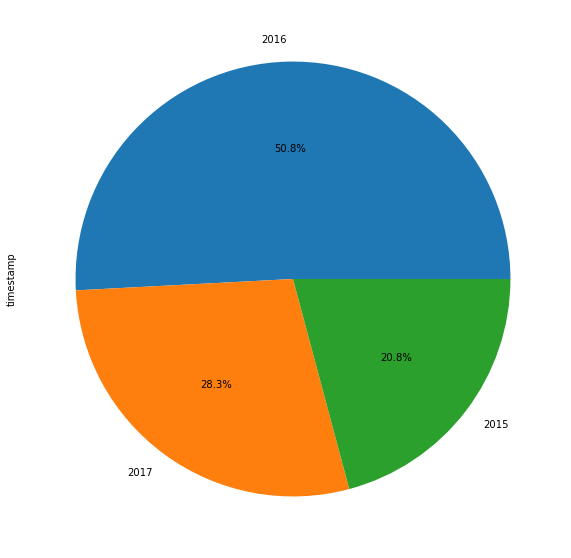

In [763]:
# Plot a visualization of the number of tweets by year
final_df['timestamp'].dt.year.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(20,10))

#### 2

<AxesSubplot:title={'center':'Dog Tweets Per Year'}, xlabel='Dog Stages', ylabel='Number of Tweets'>

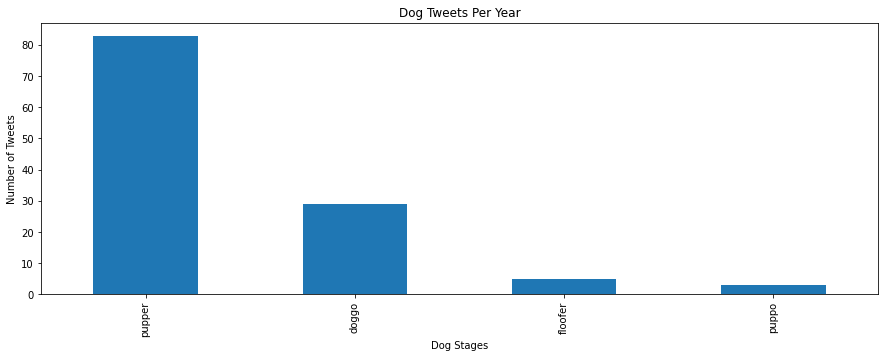

In [778]:
# Plot the dog type distribution in the final_df
final_df['dog_type'].value_counts().plot(kind='bar', figsize=(15,5), title='Dog Tweets Per Year', rot=90, xlabel='Dog Stages', ylabel='Number of Tweets')

#### 3

In [753]:
# Find the top 50 most common dog breeds
top_20_breeds = final_df['p1'].value_counts().sort_values(ascending=False).head(20)

<AxesSubplot:title={'center':'Top 20 Most Common Dog Breeds'}, xlabel='Dog Breeds', ylabel='Frequency'>

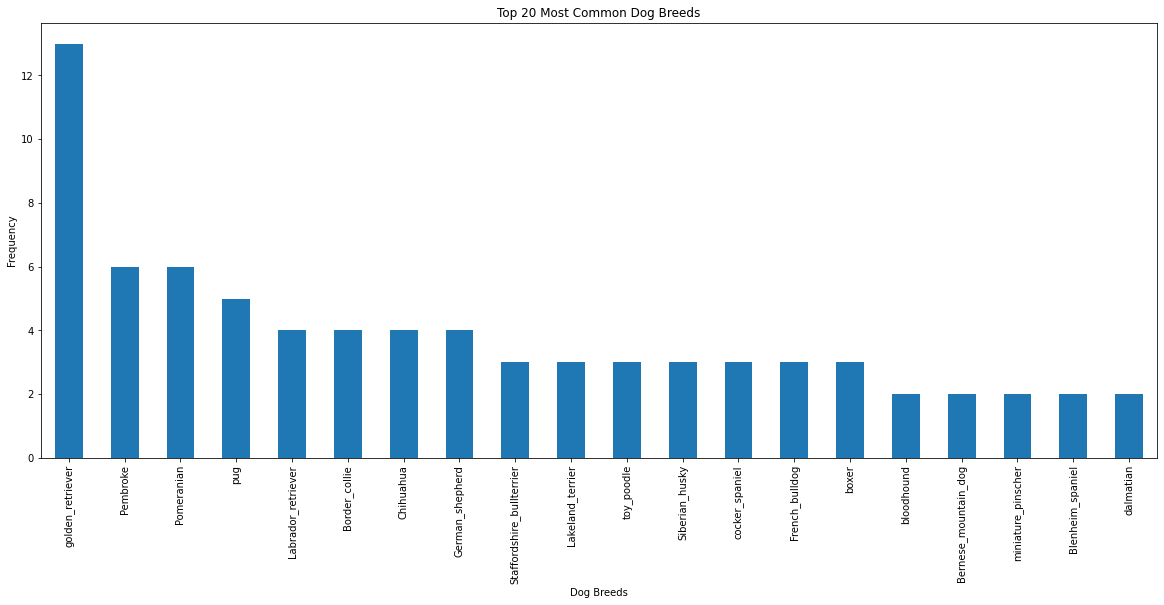

In [775]:
# Plot a bar chart of the top 50 most common dog breeds
top_20_breeds.plot(kind='bar',figsize=(20,8), title='Top 20 Most Common Dog Breeds', xlabel='Dog Breeds', ylabel='Frequency')

#### 4

In [771]:
# Breed of dogs with the most tweets
top10_tweets_breeds = final_df.sort_values(['retweet_count', 'favorite_count'], ascending=False)[['favorite_count', 'retweet_count', 'p1']].head(10)

In [772]:
top10_tweets_breeds['total_tweets'] = top10_tweets_breeds['favorite_count'] + top10_tweets_breeds['retweet_count']
top10_tweets_breeds

,favorite_count,retweet_count,p1,total_tweets
10,26404,7031,Pomeranian,33435
66,24553,7126,Norwegian_elkhound,31679
58,23302,7444,Pembroke,30746
0,32467,7711,Pembroke,40178
12,38074,10706,Staffordshire_bullterrier,48780
15,40325,11878,Great_Pyrenees,52203
4,48410,13076,golden_retriever,61486
56,31800,17209,Pomeranian,49009
49,106827,32883,French_bulldog,139710
20,95450,42228,standard_poodle,137678


<AxesSubplot:xlabel='Dog Breeds', ylabel='Total Tweets'>

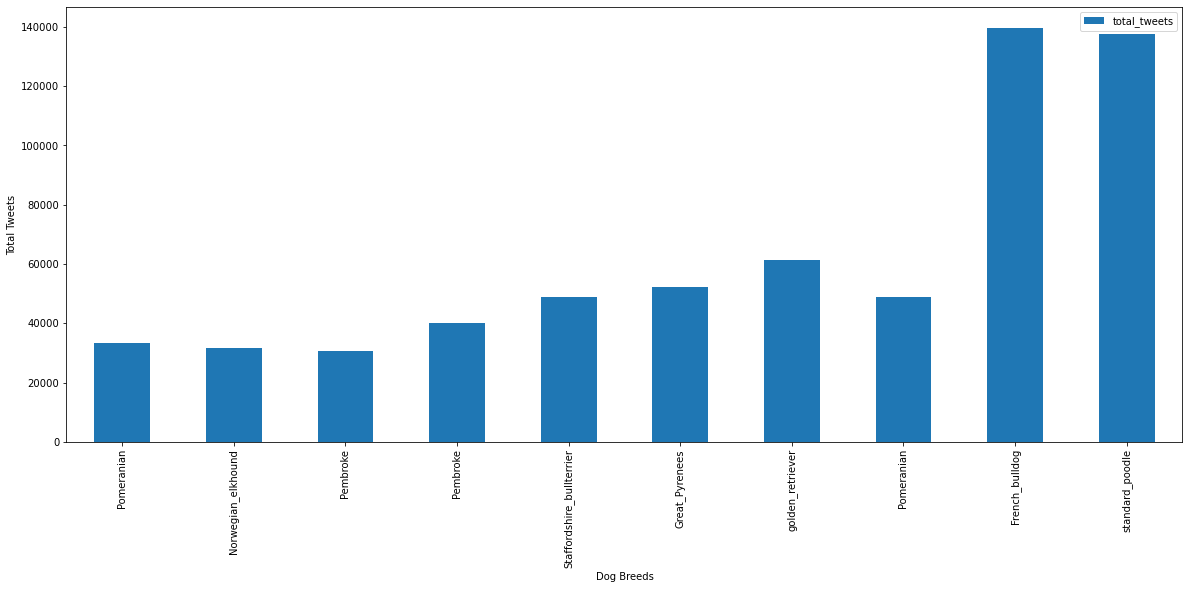

In [784]:

top10_tweets_breeds.plot(kind='bar', x='p1', y='total_tweets', figsize = (20, 8), xlabel='Dog Breeds', ylabel='Total Tweets')

### 5

### Insights:
1. 

2.

3.

### Visualization